In [1]:
import sys
sys.path.append('../pyorderedfuzzy')
sys.path.append('../pyimgamo')

In [2]:
import imgamo
from problems import Kursawe
from players import ClonalSelection
from operators import hiper_mutate
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
nvars = 3
nobjs = 2
bounds = ((-5.0, 5.0),) * nvars

In [4]:
problem = Kursawe(nvars=nvars, nobjs=nobjs, bounds=bounds, need_repair=False)

In [5]:
players = [ClonalSelection(i, nclone=15, supp_level=0, mutate=hiper_mutate, mutate_args=(0.45, 0.9, 0.1))
           for i in range(nobjs)]

In [6]:
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=1000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [7]:
solver = imgamo.IMGAMO(problem, players, options)

In [8]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [21236. 21236.]
Front size:  182
Elapsed time: 0.223052307

Iteration:  200
Evaluation count:  [42750. 42750.]
Front size:  200
Elapsed time: 0.7637189459999999

Iteration:  300
Evaluation count:  [64460. 64460.]
Front size:  200
Elapsed time: 1.4565623100000002

Iteration:  400
Evaluation count:  [85662. 85662.]
Front size:  200
Elapsed time: 1.9499055220000003

Iteration:  500
Evaluation count:  [106402. 106402.]
Front size:  200
Elapsed time: 2.608126625

Iteration:  600
Evaluation count:  [127692. 127692.]
Front size:  200
Elapsed time: 3.2708843260000005

Iteration:  700
Evaluation count:  [149132. 149132.]
Front size:  200
Elapsed time: 4.045807019

Iteration:  800
Evaluation count:  [170200. 170200.]
Front size:  200
Elapsed time: 4.83517142

Iteration:  900
Evaluation count:  [191386. 191386.]
Front size:  200
Elapsed time: 5.432517545

Iteration:  1000
Evaluation count:  [212426. 212426.]
Front size:  200
Elapsed time: 6.09534828

Iteration: 

In [9]:
solver.result.summary()

Iterations:  1000
Evaluation count:  [212426. 212426.]
Evaluation count per iteration:  [212.426 212.426]
Front size:  200
Time: 6.116834993
Time per iteration: 0.006116834993000001


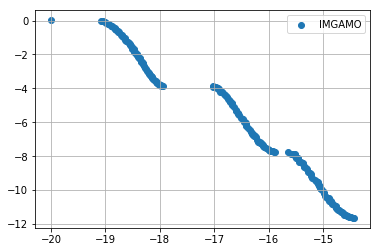

In [10]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()